# Майнор по Анализу Данных, Группа ИАД-2
## Домашнее задание №2: Классификация текстовых данных

<hr\>
В задании вы будете решать задачу бинарной классификации текстов. Вы познакомитесь с основными инструментами sklearn, необходимыми для обработки текстов. Перед применением методов sklearn внимательно читайте документацию к ним: это полезно и помогает делать меньше ошибок.

**Общая информация**

**Срок сдачи:** 1 мая 2017, 9:00 <br\>

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com`, X = 3 или 4 (ИАД 3 или ИАД4), указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [HW2, ИАД-X] Фамилия Имя **<br\>

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.
__Старайтесь не копировать похожие участки кода. Везде, где это возможно, оформляйте код в функцию.__

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

<p>Чтобы узнать свой вариант, введите Вашу фамилию на русском языке в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
name = "БобровскихГлеб" # Ваши ФамилияИмя

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in name.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


Фильмы - ееее рок:D

<p><b>Варианты</b></p>

В зависимости от варианта нужно будет научиться определять...

**1.** ...является ли SMS сообщение спамом? 
* Зайдите на [страничку с данными](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) на сайте репозитория UCI.
* Нажмите на «Data Folder», скачайте и распакуйте архив.
* Открыть SMSSpamCollection можно с помощью pd.read_csv, указав `sep='\t'`.

**2.** ...положительна или отрицательна рецензия на фильм?
* Зайдите на [страничку с данными](http://www.cs.cornell.edu/people/pabo/movie-review-data/) на сайте Корнельского университета.
* Нажмите на «polarity dataset v2.0» и распакуйте архив. 
* Каждый текстовый файл соответствует одной рецензии. Вам придётся [построить список всех файлов в папке](http://stackoverflow.com/questions/3207219/how-to-list-all-files-of-a-directory), а затем последовательно открыть их и прочитать тексты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import re
def convert_text(s):
    # Removes all characters from string except letters and digits and convert letters to lowercase
    return re.sub("[^a-zA-Z0-9]", " ", s.lower())

In [3]:
from os import listdir
from os.path import isfile, join
mypath = '/home/bobrg/anaconda3/txt_sentoken/pos'
txt = []
txt = [convert_text(open(join(mypath, f), 'r').read())for f in listdir(mypath)
             if isfile(join(mypath, f))]
labels = [1] * len(txt)
mypath = '/home/bobrg/anaconda3/txt_sentoken/neg'
txt.extend([convert_text(open(join(mypath, f), 'r').read()) for f in listdir(mypath)
                               if isfile(join(mypath, f))])
labels.extend([0] * (len(txt) - len(labels)))

In [4]:
len(txt)

2000

## Задача 1
#### Классификация текстовых сообщений (2 балла)

<ol>
    <li>Загрузите исходные данные --- список текстов и список соответствующих им меток</li>
    <li>Разбейте объекты на обучающее (train) и тестовое подможества (test) в пропорции 7:3</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настраивать только на обучающем подмножестве, n-gram=1, слова приведите в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Мультиномиальный наивный Байес ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации (по доле правильных классификаций) на тестовом подмножестве</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [5]:
random_state = 12345 # для всех объектов/методов/моделей

Параметры логистической регрессии
```
penalty='l2'
fit_intercept=True
max_iter=100
C=1
solver="lbfgs"
random_state=12345
```

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(txt, labels, test_size=0.3, random_state=12345)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [7]:
len(X_train) / len(txt)

0.7

### Векторизация текстов

Используется для перевода текста/пикчей в численный вид для возможности последующей обработки методами машинного обучения.
Одна из самых распространенных стратегий - токенизация, подсчет, нормализация. Также называют Мешком Слов. Следует следующим пунктам:
*  -Каждому слову присваивается уникальный id-шник или токен, который является целым числом.
*  -Производится подсчет встреч каждого уникального токена в документе.
*  -Нормализация (иногда с добавлением весов) полученных значений с целю уменьшить влияние наиболее часто встречающихся слов.
Каждый токен играет роль фичи, а вектор таких фич (частот встреч каждого слова в документе) является многомерно распределенной выборкой.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tr = TfidfVectorizer(lowercase=True,ngram_range=(1,1))
df_train = tr.fit_transform(X_train)

In [9]:
df_train

<1400x33847 sparse matrix of type '<class 'numpy.float64'>'
	with 462281 stored elements in Compressed Sparse Row format>

The result of Tfidf vectorization is enormous matrix which is mostly filled
by zeros. This happends because collection of texts have huge amount of unique words while individual text uses very few of them.<br> </br>
However, we still have to store this matrix of features and sparse representation helps us to reduce memory usage and speed up algebraic operations.

Another way to make transformation:
```
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(ngram_range=(1, 1))
df = count_vec.fit_transform(X_train).toarray()
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
df_train = pd.DataFrame(data=transformer.fit_transform(df).toarray(),
                       columns=count_vec.get_feature_names())
```
but TfidfVectorizer is more commonly used.

###  Обучение моделей:
* KNN
* Logistic Regression
* MultinomialNaiveBayes

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(df_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
%timeit knc.fit(df_train, y_train)

100 loops, best of 3: 2.18 ms per loop


In [12]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100,
                          C=1, solver="lbfgs", random_state=12345)
logr.fit(df_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12345, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
%timeit logr.fit(df_train, y_train)

10 loops, best of 3: 106 ms per loop


In [14]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(df_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
%timeit mnb.fit(df_train, y_train)

100 loops, best of 3: 6.72 ms per loop


### Построение прогноза на тестовой подвыборке.
Векторизуем тексты из теста и проверим предсказания обученых моделей.

In [16]:
df_test = tr.transform(X_test)
df_test

<600x33847 sparse matrix of type '<class 'numpy.float64'>'
	with 198042 stored elements in Compressed Sparse Row format>

In [17]:
yy_knc = knc.predict(df_test)

In [18]:
from sklearn.metrics import mean_absolute_error, accuracy_score
print('mae:', mean_absolute_error(yy_knc, y_test))
print('accuracy score', accuracy_score(yy_knc, y_test))

mae: 0.415
accuracy score 0.585


In [19]:
%timeit knc.predict(df_test)

1 loop, best of 3: 269 ms per loop


In [20]:
yy_lgr = logr.predict(df_test)

In [21]:
print('mae:', mean_absolute_error(yy_lgr, y_test))
print('accuracy score:', accuracy_score(yy_lgr, y_test))

mae: 0.178333333333
accuracy score: 0.821666666667


In [22]:
%timeit logr.predict(df_test)

1000 loops, best of 3: 631 µs per loop


µs - microseconds - WOW! :D

In [23]:
yy_mnb = mnb.predict(df_test)

In [24]:
print('mae:', mean_absolute_error(yy_mnb, y_test))
print('accuracy score:', accuracy_score(yy_mnb, y_test))

mae: 0.228333333333
accuracy score: 0.771666666667


In [25]:
%timeit mnb.predict(df_test)

1000 loops, best of 3: 1.51 ms per loop


### Пояснения по результатам:
**Scores:**

*Худшее качество показала модель k ближайших соседей, при k=5. Предсказывает чуть больше половины правильно. С соседями частенько такое бывает, поэтому посмотрим какое число соседей будет более удачным на кросс-валидации.*

*Лучше всего спрогнозировала Линейная регрессия. Результат ~82%.*

*Наивный байес тоже показал себя удовлетворительно дав скор ~77%.*

**Fitting time:**
* Дольше всего настраивается Логистическая регрессия, поскольку ей нужно настроить параметры сигмоиды, чтобы максимизировать функцию правдоподобия. Для этого применяется метод градиентного спуска, который и дает проигрыш во времени настройки.
* Меньше всего времени на настройку тратит модель K Nearest Neighbours, поскольку она лишь запоминает выборку.
* Наивный Байес настроивался дольше метода ближайших соседей, потому как он выстраивает более сложную зависимость между ответами и обьектами. Однако у Байеса время потраченное на обучение меньше, чем у Линейной регрессии, поскольку мы просто считаем вероятности P(C) и P(O|C), где С - класс, а О - признаки сэмпла.
Prediction time:
На предсказании модели ведут себя противоположно своему поведению на настройке, т.е.:
* Дольше всего предсказывает модель KNN, поскольку она должна померить расстояния евклидовой метрикой для каждого элемента из теста и каждого элемента из заученого трейна.
* Меньше времени тратит Логистическая регрессия, поскольку она оценивает вероятности принадлежности точки к одному из классов по построенной разделяющей функции, то есть высчитывает вероятноятность подставляя новые значения в сигмоиду.
* Наивный Байес показал результат лучше чем KNN, поскольку он как и регрессия просто подставляет новые значения из теста в выстроенную зависимость. Однако в его оценке участвует логарифм, поэтому и требуется больше времени на построение предсказания.

## Задача 2.
#### Применение k-folds (3 балла)

<p>1. Повторите решение задачи 1, но вместо одного разделения на обучение и контроль используйте разбиение k-folds (k=4). Вам понадобится повторить все действия 4 раза. <br>
2. Какой классификатор показывал лучшее/худшее качество на тестовой выборке? А при k-folds разбиении? Как вы думаете, обязательно ли в данной задаче оценивать качество на кросс-валидации, или достаточно отложить контрольную выборку и оценивать качество на ней?</p>

In [26]:
random_state = 12345 # для всех объектов/методов/моделей

In [27]:
from sklearn.model_selection import KFold
def kfold(model, data, labels, k):
    tmp_model = model
    vec = TfidfVectorizer(lowercase=True, ngram_range=(1,1))
    kfld = KFold(n_splits=k, random_state=12345, shuffle=True)
    
    y_pred = np.zeros(len(labels))
    
    for i_train, i_test in kfld.split(data):
        
        Xx_train, Xx_test = vec.fit_transform(data[i_train]), vec.transform(data[i_test])
        
        Yy_train = labels[i_train]
        
        tmp_model.fit(Xx_train, Yy_train)
        
        y_pred[i_test] = tmp_model.predict(Xx_test)
    print(accuracy_score(y_pred, labels))

In [28]:
print('-------------------KNN--------------------')
kfold(knc, np.asarray(txt), np.asarray(labels), 4)
print('-------------------LR--------------------')
kfold(logr, np.asarray(txt), np.asarray(labels), 4)
print('-------------------MNB--------------------')
kfold(mnb, np.asarray(txt), np.asarray(labels), 4)

-------------------KNN--------------------
0.575
-------------------LR--------------------
0.8195
-------------------MNB--------------------
0.7935


Results:
* Качество K Ближайших соседей упало по сравнению с прямым разбиением на тест и трейн ~ на 0.1 процент. Еще раз убеждаемся в ненадежности этого метода классификации в решении данной задачи.
* Логистическая регрессия, тоже потеряла в результате, однако не столь сильно и все еще показывает лучший результат.
* МультиномиальныйБайес единственный улучшил свой результат на чуть больше 2%, что тоже весьма хорошо.

Нужно подбирать другие параметры.

## Задача 3.
#### Выбор модели (5 баллов)

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Рассмотрим следующие варианты значений гиперпараметров для наших классификаторов:  </p>

<p>K-ближайших соседей</p>

In [29]:
ns = np.arange(1, 150, 20) # количество соседей

<p>Логистическая регрессия</p>

In [30]:
cs = np.logspace(-2, 10, 8, base=10) # параметр регуляризации

<p>Мультиномиальный наивный Байес</p>

In [31]:
alphas = np.logspace(-4, 1, 8, base=10) # сглаживающий параметр

<p style="padding-left:15px;"> Найдите оптимальные значения гиперпараметров для классификаторов на кросс-валидации. Для этого постройте графики (гиперпараметр)-(качество) на обучении и валидации. <br> _Пояснение:_ вы разбили обучающую выборку на 4 блока. Для каждого значения гиперпараметра 4 раза повторите следующее: берем 3 блока для обучения, по ним настраиваем  TfIdf и обучаем классификатор, считаем качество на этих блоках (качество на обучении) и на оставшемся (качество на валидации). Итоговое значение качества на обучении для данного значения гиперпараметра - это среднее четырех полученных значений качества на обучении, то же самое с итоговым значением качества на валидации.  <br>
3. 3 настроенные модели обучите на всем обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
4. Повторите шаги 2-4 для n-gram=2<br>
5. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
6. Сделайте выводы по полученным результатам: <ul>
<li>какой метод показал наилучшее качество на обучении? на валидации? на тестовой выборке? Если это разные классификаторы, подумайте, почему так происходит. Если один и тот же, в чем его преимущества перед остальными?</li>
<li>велика ли разница между качеством на обучении и на валидации? на валидации и контроле? Почему так происходит?</li>
<li>что означает n-gram=2? Улучшилось ли качество при переходе от n-gram=1 к n-gram=2? Предложите свои идеи, почему.</li>
<li>есть ли связь между качеством классификации и временем обучения/предсказания? какой классификатор обучается медленнее всего? медленнее всего делает предсказания? В чем причина?</li>
</ul></p>

In [32]:
random_state = 12345 # для всех объектов/методов/моделей

In [129]:
# Function for testing classifier in on crossvalidation with kfold;
def hyperparams_info(model, dt, l, ngr):
    tmp = model
    kfld=KFold(n_splits=4, random_state=12345, shuffle=True)
    # quality on validation fold;
    qual_valid = []
    for i_tr, i_tst in kfld.split(dt):
        # tuning tfidf on training folds;
        vec = TfidfVectorizer(lowercase=True, ngram_range=(ngr,ngr))
        tr = vec.fit_transform(dt[i_tr])
        tmp.fit(tr, l[i_tr])
        qual_valid.append(accuracy_score(tmp.predict(vec.transform(dt[i_tst])), l[i_tst]))
    # return mean quality of validation;    
    return np.mean(qual_valid)

def plotting(qual, model_name):
    param = [i[0] for i in qual]
    fig1 = plt.figure(figsize=(8,8))
    ax1 = plt.subplot()
    ax1.plot(param, [i[2] for i in qual], label='Validation')
    ax2 = plt.subplot()
    ax2.plot(param, [i[1] for i in qual], label='whole set test')
    plt.legend(loc=1, ncol=1)
    plt.xlabel('Parameter')
    plt.ylabel('Quality')
    plt.title(model_name)
    
def plotting_scatter(qual, model_name):
    param = [i[0] for i in qual]
    fig1 = plt.figure(figsize=(8,8))
    ax1 = plt.subplot()
    ax1.scatter(param, [i[2] for i in qual], label='Validation')
    ax2 = plt.subplot()
    ax2.scatter(param, [i[1] for i in qual], label='Whole set test')
    plt.legend(loc=1, ncol=1)
    plt.xlabel('Parameter')
    plt.ylabel('Quality')
    plt.title(model_name)

def time_measure(model, train, test, labels, ii):
    print('--->{}\n fitting time:'.format(model))
    %time model.fit(train, labels[:ii])
    print('prediction time:')
    %time model.predict(test)

------------------Best-validation------------------
ngrams - (2, 2)
n-neigbours - 1.0
result validation - 0.63

------------------Testing-best-model------------------
n-neigbours - 1.0
ngrams - (2, 2)
Result: 0.6783333333333333

Time measurement
--->KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
 fitting time:
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.59 ms
prediction time:
CPU times: user 232 ms, sys: 0 ns, total: 232 ms
Wall time: 230 ms
------------------Best-validation------------------
ngrams - (2, 2)
n-neigbours - 101.0
result validation - 0.7135714285714285

------------------Testing-best-model------------------
n-neigbours - 101.0
ngrams - (2, 2)
Result: 0.755

Time measurement
--->KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=101, p=2,
           weights='uniform')
 f

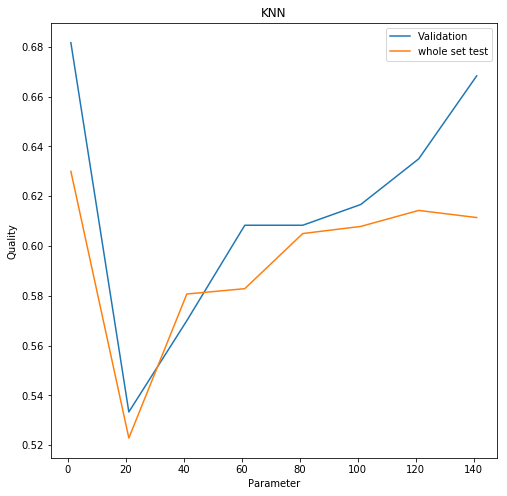

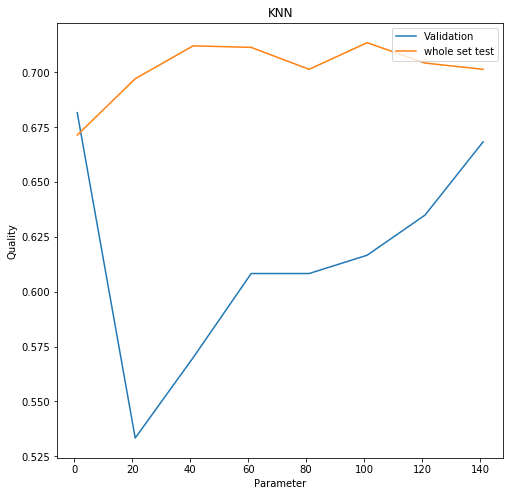

In [116]:
# KNearestNeighbors;
qual = np.zeros((len(ns), 3))
# qual[0] - parameter;
# qual[1] - validation score;
# qual[2] - train score;

# repeat for ngrams=1 and =2
for ngr in range(1, 3):
    j = 0
    #ngrams = (ngr,ngr)
    # for each hyperparameter determine model, call function for crossvalidation on 4 folds
    # and train model on training set;
    for i in ns:
        knc_ = KNeighborsClassifier(n_neighbors=i)
        qual[j][0] = i
        qual[j][1] = hyperparams_info(knc_, np.asarray(X_train), np.asarray(y_train), ngr)
        # fit best model on train data and validate on test from task 1;
        knc_.fit(df_train, y_train)
        qual[j][2] = accuracy_score(knc_.predict(df_test), y_test)
        j += 1
    # plot quality-parameter dependence;
    plotting(qual, 'KNN')
    # find best validation result;
    tmp = max(qual, key=lambda a: a[1])
    print('------------------Best-validation------------------',
          'ngrams - {}'.format(ngrams),
          'n-neigbours - {}'.format(tmp[0]),
          'result validation - {}'.format(tmp[1]),
           sep = '\n'
         )
    # fit best model on train data and validate on test from task 1;
    vec = TfidfVectorizer(lowercase=True, ngram_range=ngrams)
    tr = vec.fit_transform(X_train)
    ts = vec.transform(X_test)
    knc_ = KNeighborsClassifier(n_neighbors=int(tmp[0]))
    knc_.fit(tr, y_train)
    y_pred = knc_.predict(ts)
    print('\n------------------Testing-best-model------------------',
          'n-neigbours - {}'.format(tmp[0]),
          'ngrams - {}'.format(ngrams),
          'Result: {}'.format(accuracy_score(y_test, y_pred)),
          sep='\n'
         )
    print('\nTime measurement')
    time_measure(knc_, tr, ts, labels, 1400)

------------------Best-validation------------------
ngrams - (1, 1)
C - 26.826957952797247
result validation - 0.8328571428571429

------------------Testing-best-model------------------
C - 26.826957952797247
ngrams - (1, 1)
Result: 0.855

Time measurement
--->LogisticRegression(C=26.826957952797247, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=12345,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
 fitting time:
CPU times: user 1.73 s, sys: 4 ms, total: 1.74 s
Wall time: 869 ms
prediction time:
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 930 µs
------------------Best-validation------------------
ngrams - (2, 2)
C - 71968.56730011514
result validation - 0.8235714285714285

------------------Testing-best-model------------------
C - 71968.56730011514
ngrams - (2, 2)
Result: 0.8516666666666667

Time measurement
--->LogisticRegression(C=71968.5

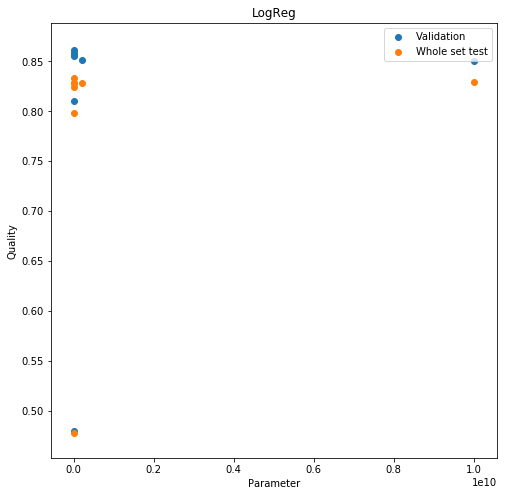

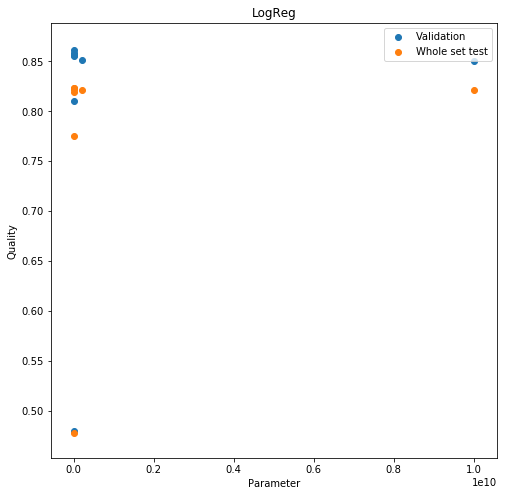

In [74]:
#LogisticRegression
lst = [[],[]]
qual = np.zeros((len(cs), 3))
for ngr in range(1, 3):
    j = 0
    ngrams = (ngr,ngr)
    for i in cs:
        logr_ = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100,
                          C=i, solver="lbfgs", random_state=12345)
        qual[j][0] = i
        qual[j][1] = hyperparams_info(logr_, np.asarray(X_train), np.asarray(y_train), ngrams)
        # fit best model on train data and validate on test from task 1;
        logr_.fit(df_train, y_train)
        qual[j][2] = accuracy_score(logr_.predict(df_test), y_test)
        j += 1
    # plot quality-parameter dependence;
    plotting_scatter(qual, 'LogReg')
    lst[ngr-1] = [i[1] for i in qual.copy()]
    tmp = max(qual, key=lambda a: a[1])
    print('------------------Best-validation------------------',
          'ngrams - {}'.format(ngrams),
          'C - {}'.format(tmp[0]),
          'result validation - {}'.format(tmp[1]),
          sep = '\n'
         )
    logr_ = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100,
                        C=tmp[0], solver="lbfgs", random_state=12345)
    # fit best model on train data and validate on test from task 1;
    vec = TfidfVectorizer(lowercase=True, ngram_range=ngrams)
    tr = vec.fit_transform(X_train)
    ts = vec.transform(X_test)
    logr_.fit(tr, y_train)
    y_pred = logr_.predict(ts)
    print('\n------------------Testing-best-model------------------',
          'C - {}'.format(tmp[0]),
          'ngrams - {}'.format(ngrams),
          'Result: {}'.format(accuracy_score(y_test, y_pred)),
          sep='\n'
         )
    print('\nTime measurement')
    time_measure(logr_, tr, ts, labels, 1400)

In [75]:
# to verify if they are identical or not, because it is hard to understand from plot
lst[0]==lst[1]

False

------------------Best-validation------------------
ngrams - (1, 1)
alpha - 0.07196856730011521
result validation - 0.772142857142857

------------------Testing-best-model------------------
alpha - 0.07196856730011521
ngrams - (1, 1)
Result: 0.8033333333333333

Time measurement
--->MultinomialNB(alpha=0.071968567300115208, class_prior=None, fit_prior=True)
 fitting time:
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.3 ms
prediction time:
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.61 ms
------------------Best-validation------------------
ngrams - (2, 2)
alpha - 0.07196856730011521
result validation - 0.8157142857142857

------------------Testing-best-model------------------
alpha - 0.07196856730011521
ngrams - (2, 2)
Result: 0.8333333333333334

Time measurement
--->MultinomialNB(alpha=0.071968567300115208, class_prior=None, fit_prior=True)
 fitting time:
CPU times: user 44 ms, sys: 0 ns, total: 44 ms
Wall time: 43.1 ms
prediction time:
CPU times: user 8 ms, sy

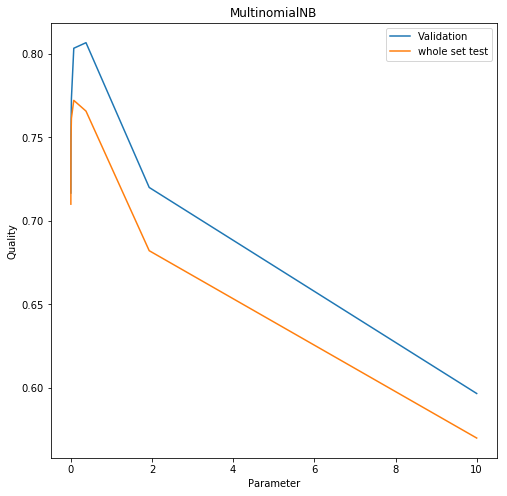

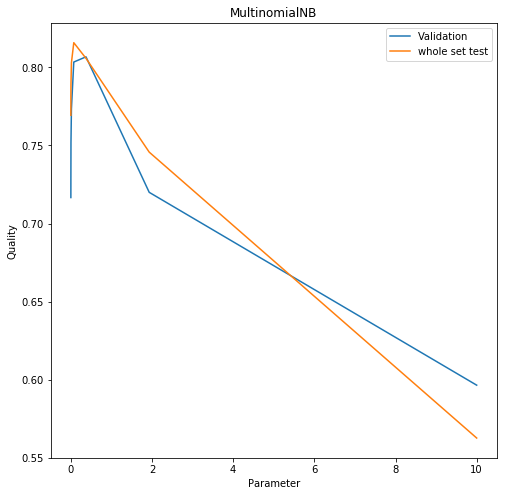

In [76]:
#MultinomialNB
qual = np.zeros((len(alphas), 3))
for ngr in range(1, 3):
    j = 0
    ngrams = (ngr,ngr)
    for i in alphas:
        mnb_ = MultinomialNB(alpha=i)
        qual[j][0] = i
        qual[j][1] = hyperparams_info(mnb_, np.asarray(X_train), np.asarray(y_train), ngrams)
        # fit best model on train data and validate on test from task 1;
        mnb_.fit(df_train, y_train)
        qual[j][2] = accuracy_score(mnb_.predict(df_test), y_test)
        j += 1
    # plot quality-parameter dependence;
    plotting(qual, 'MultinomialNB')
    tmp = max(qual, key=lambda a: a[1])
    print('------------------Best-validation------------------',
          'ngrams - {}'.format(ngrams),
          'alpha - {}'.format(tmp[0]),
          'result validation - {}'.format(tmp[1]),
          sep = '\n'
         )
    mnb_ = MultinomialNB(alpha=tmp[0])
     # fit best model on train data and validate on test from task 1;
    vec = TfidfVectorizer(lowercase=True, ngram_range=ngrams)
    tr = vec.fit_transform(X_train)
    ts = vec.transform(X_test)
    mnb_.fit(tr, y_train)
    y_pred = mnb_.predict(ts)
    print('\n------------------Testing-best-model------------------',
          'alpha - {}'.format(tmp[0]),
          'ngrams - {}'.format(ngrams),
          'Result: {}'.format(accuracy_score(y_test, y_pred)),
          sep='\n'
         )
    print('\nTime measurement')
    time_measure(mnb_, tr, ts, labels, 1400)

### Ngrams = 2 Explanation
[some info about choosing n-grams and cv](https://stats.stackexchange.com/questions/155483/estimating-the-best-length-of-n-gram) <br> </br>
*'что означает n-gram=2?'* <br> </br>
N-gram=2 будет парсить строку на посл-ти из двух слов, в отличе n-grams=1 которое вычленяет по слову из строки.
(перекрест в одно слово: … to be or not to be …	=> …, to be, be or, or not, not to, to be, …)

### Best Results:
### K Ближайших соседей:
* **ngrams** = (2, 2)
* **n-neigbours** = 101.0
* **Валидация** ~ 0.714
* **Результат на всем сете** = 0.755
* **Время на обучении** - 3.33 ms
* **Время предсказания** - 207 ms

### Линейная регрессия:
* **ngrams** = (1, 1)
* **C** ~ 26.83
* **Валидация** ~ 0.833
* **Результат на всем сете** ~ 0.855
* **Время на обучении** - 869 ms
* **Время на предсказании** - 930 µs
### Байес:
* **ngrams** = (2, 2)
* **alpha** ~ 0.072
* **Валидация** ~ 0.816
* **Результат на всем сете** ~ 0.83
* **Время на обучении** - 43.1 ms
* **Время на предсказании** - 6.55 ms

### Results explanation
* Наилучшее качество на валидации показала Линейная регрессия - 0.8328 с парметрами n-grams = 1 и C~26.82. Второй лучший результат у Мультиномиального Байеса - 0.8157 при параметрах n-grams =2 и alpha~0.072.
* На всем сете (то есть трейн + тест) лучший скор снова показывает Линейная регрессия - 0.855 с теми же параметрами, что и при лучшей валидации. Второй лучший результат снова у Байеса и разрыв не так велик, как у Ближайших соседей - всего ~2%.
*Вышеперечисленные скоры дают нам понять, каким моделям стоит отдать предпочтение при решении подобной задачи. Метод ближайших соседей не самый лучший выбор в виду его простоты (запоминание выборки, а не выстраивание какой-то более сложной зависимости). В тоже время хорошо показали себя как и Линейная регрессия так и Наивный Байес.*
* На обучение больше всего времени потратила Линейная регрессия, поскольку как было обьяснено выше данная модель выстраивает линейную зависимость между обьектами и ответами и ей необходимо настроить параметры при каждой фиче, которых тут очень много. Это и дает такой заметный проигрыш во времени обучения, но после Линейная регрессия тратит столь же заметно мало времени для предсказания результов, по сравнению с конкурентами. Больше всего времени на предсказание потратила модель K ближайших соседей и как было сказано выше в задаче 1, это легко обосновать если вспомнить каким образом модель предсказывает результаты - сравнение обьектов тестовой выборки с k соседями трейновой. Это конечно же требует много времени для построения предсказания, а вот на обучении на оборот дает выигрыш, ведь выборка просто запоминается. 
Немного не до конца понял зачем нужно проверять модели на выборках на которых они обучаются( если я понял пояснение к задаче верно), ведь они очевидно дадут лучшее качество чем на валидации, причем эти результы будут абсолютно не показательны. 

## Задача 4. (опционально)
#### Исследование влияния количества признаков FeatureHasher на качество классификации (+3 балла к сумме по всем ДЗ) 

<p>Изучите, что такое feature hashing (достаточно разобаться с документацией sklearn) и кратко опишите. Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [49]:
n_features = np.logspace(1, 5, 5, base=10) # количество признаков
non_negative=True

<p>В этом задании можно воспользоваться GridSearchCV</p>

In [50]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

Feature Hasher

В сравнении с методом Bag of words, Feature Hasher пользуется стратегией hashing trick для выделения фичей.

Суть этого подхода схожа с составлением hash table, только на выходе мы получаем вектор фичей, детерменированной 

размерности, которая определяется data scientist'ом. После определения длины выходного вектора берется хэш-функция,

которая отображает наши слова-признаки в пространство числовых токенов. Результат функции целочисленно делиться на размер вектора

и полученное число определяет индекс в реузьтирующем векторе, куда будет записано число встреч данного слова.

Подобный подход имеет свои преимущества перед tf-idf vectorizer'ом, но и свои недостатки (куда без них):

 - Данный подход выигрывает по времени обработки информации и очень удобен для формирования вектора фичей "на лету".

 - Данный подход не позволяет провернуть обратную трансформацию признаков ( например если мы хотим узнать какой признак

 имел наибольшее влияние на результат).

 - Могут возникнуть коллизии при добавлении фичей в вектор, если у слов был высчитан один и тот же хэш. Однако на практике

 это редко приводит к серьезным последствиям и обычно используются векторы достаточно большого размера ( >= 2 ** 18)

Пример:

 "the quick brown fox" 

 let's say we want length 5 in output. Then

 h(the) mod 5 = 0

 h(quick) mod 5 = 1

 h(brown) mod 5 = 1

 h(fox) mod 5 = 3



 Once we have this we can simply construct our vector as:



 (1,2,0,1,0)


In [78]:
scorer = make_scorer(accuracy_score)
#try various features
for i in n_features:
    #apply featurehasher to texts
    fh = FeatureHasher(n_features=int(i), non_negative=True, input_type="string")
    fh_txt = fh.fit_transform(txt)
    print('n_features:', int(i))
    knc_fh = KNeighborsClassifier()
    logr_fh = LogisticRegression() 
    mnb_fh = MultinomialNB()
    #apply gridsearchvb to indentify best score and best parameters
    gscv_knc = GridSearchCV(knc_fh, param_grid={'n_neighbors': ns}, scoring=scorer, cv=4)
    gscv_knc.fit(fh_txt, labels)
    print('-KNC')
    print('best param:', gscv_knc.best_params_)
    print('best score: ', gscv_knc.best_score_)
    

n_features: 10
-KNC
best param: {'n_neighbors': 61}
best score:  0.5615
n_features: 100
-KNC
best param: {'n_neighbors': 41}
best score:  0.571
n_features: 1000
-KNC
best param: {'n_neighbors': 21}
best score:  0.583
n_features: 10000
-KNC
best param: {'n_neighbors': 21}
best score:  0.583
n_features: 100000
-KNC
best param: {'n_neighbors': 21}
best score:  0.583


# Задача 5. (опционально)
__Простой прототип (+ 2 балла к сумме по всем ДЗ)__

Напишите функцию, которая берет на вход произвольную строку и возвращает для нее предсказание для вашей задачи. Придумайте по 3 примера строк для положительного и отрицательного класса, сделайте для них предсказание. Совпадают ли ваши метки и предсказания классификатора? Оцените (любым способом), насколько придуманные вами тексты похожи на объекты датасета, с которым вы работали.


In [ ]:
def predict_class_for_text(s):
    pass